In [1]:
# Import Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import loan train file
df = pd.read_csv('C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week1./loans_train.csv')

## 1. My Question Of Interest
> Is there a correlation between 'TotalIncome' (i.e. ApplicantIncome + CoapplicantIncome) & 'LoanAmount' and does the number of dependents ('Dependents') change that relationship?

In [3]:
# Calculate statistics for the numerical and categorical attributes.
# I created a new field 'TotalIncome' as the sum of 'ApplicantIncome' and 'CoapplicantIncome'
# I also added a new field 'NoApplications' to count the number of applications but this can be achieved using functions
# I generated a summary of the dataframe
list_columns = ['ApplicantIncome', 'CoapplicantIncome']
df['TotalIncome'] = df[list_columns].sum(axis=1)
list_columns2 = ['Loan_ID']
df['NoApplications'] = df[list_columns2].count(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
TotalIncome          614 non-null float64
NoApplications       614 non-null int64
dtypes: float64(5), int64(2), object(8)
memory usage: 72.1+ KB


In [4]:
# I generated a statistical summary of the numerical attributes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,NoApplications
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.0
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081,1.0
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872,0.0
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000,1.0
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000,1.0
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000,1.0
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000,1.0
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000,1.0


In [5]:
# I looked at the number of dependents per loan applicant
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

## 2. Conclusion
> There are 13 columns of data and 614 rows.  Of the 13 columns, 6 are numerical and 8 are categorical.<br>
> The majority of columns contain values, with the column credit histoty missing the most values at 50 (8%).<br>
> TotalIncome has 614 values and LoanAmount has 592 so is only missing 22 (4%)<br>
> The average LoanAmount applied for was 146 and average TotalIncome was 7025


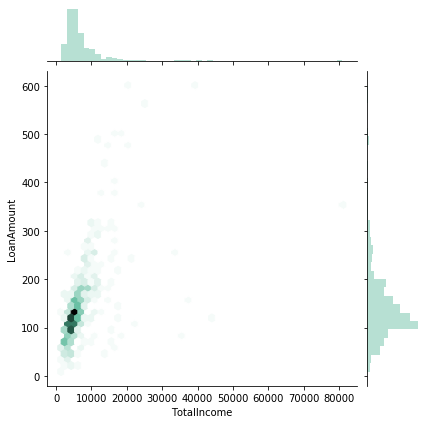

In [6]:
#Use at least two different plotting techniques to plot the distribution of some numerical attributes.
#My first graph is a jointplot of 'TotalIncome' and 'LoanAmount' with all rows with missing values removed
sns.jointplot(data=df.dropna(), x='TotalIncome', y='LoanAmount', kind="hex", color="#4CB391")

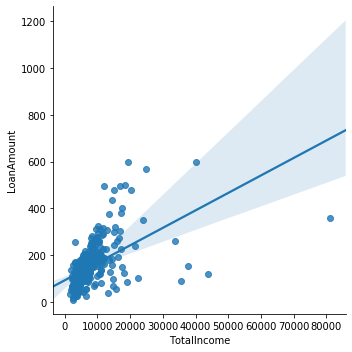

In [7]:
# My second graph is a implot of 'TotalIncome' and 'LoanAmount' with all rows with missing values removed
sns.lmplot(x='TotalIncome', y='LoanAmount', data=df.dropna())

## 3. Conclusion
> There is a strong correlation between LoanAmount and TotalIncome<br>
> The correlation is approximately 1:50

In [8]:
'Generate two plots with the combined distribution of attributes'

'Generate two plots with the combined distribution of attributes'

In [9]:
# sns.catplot(x='TotalIncome', y='LoanAmount',
#            col='Dependents', aspect=1,
#           data=df.dropna());

In [10]:
# sns.catplot(data=df.dropna(), orient='h', col='Loan_Status', row='Dependents');

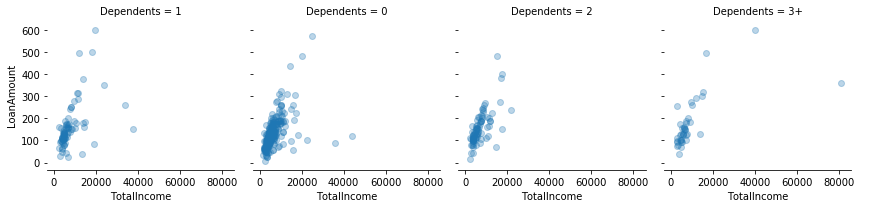

In [11]:
# My first graph is a facetgrid showing a scatter of 'TotalIncome' and 'LoanAmount'
# split by number of dependants, with all rows with missing values removed and 
g = sns.FacetGrid(data=df.dropna(), col='Dependents')
g.map(plt.scatter, 'TotalIncome', 'LoanAmount', alpha=.3)
g.add_legend()
g.despine(left=True);

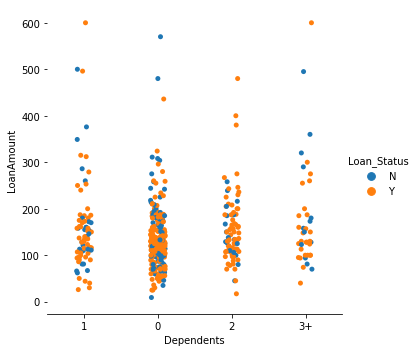

In [12]:
# My second graph is a catplot showing 'LoanAmount' versus number of 'Dependents'
# split by 'Loan_Status', with all rows with missing values removed
g = sns.catplot(x='Dependents', y='LoanAmount', hue='Loan_Status', data=df.dropna(),
                height=5)
g.despine(left=True)

In [13]:
# a pivot table showing % of successful and unsuccessful loans ('Loan_Status') per number of 'Dependents'
pd.pivot_table(df.dropna(), values=[], columns=['Dependents'],index=['Loan_Status'],aggfunc=len).div(len(df.dropna().index)).mul(100)


Dependents,0,1,2,3+
Loan_Status,,,,
N,18.125000,5.833333,4.166667,2.708333
Y,38.958333,10.833333,13.541667,5.833333


## 4. Conclusion
> There a correlation between 'TotalIncome' (i.e. ApplicantIncome + CoapplicantIncome) & 'LoanAmount' that<br>
is not influenced by  the number of dependents of the applicant.  Also, the correlation does not significantly<br>
wether the loan was successful or not.